<div style="text-align: right"> 29.11.2019</div>

***Name:*** 

# Hausaufgabe Blatt 6

## Mathematisches Pendel

In dieser Aufgabe werden wir die Bewegungsgleichung eines (mathematischen) Pendels numerisch lösen. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Um diese Gleichung numerisch lösen zu können, werden wir die gegeben Differentialgleichung zweiter Ordnung in zwei Differentialgleichungen erster Ordnung überführen:

\begin{align*}
        \dot \varphi &= \omega \tag{1}\\
        \dot \omega &= -\frac{g}{L} \sin  \varphi.  \tag{2}
\end{align*}

Bevor wir die Gleichungen (1) und (2) numerisch lösen können, müssen wir diese diskretisieren. Wie auf Aufgabenblatt 3 werden wir dazu das Euler Verfahren benutzen. Hier wird die Ableitung nach der Zeit durch kleine diskrete Änderungen in der Zeit $\Delta t$ approximiert. 

\begin{align*}
\dot \varphi &= \frac{\mathrm{d}\varphi}{\mathrm{d}t}\approx \frac{\Delta \varphi}{\Delta t} \\
\dot \omega &= \frac{\mathrm{d}\omega}{\mathrm{d}t}\approx \frac{\Delta \omega}{\Delta t} \\
\end{align*}

Umstellen der Gleichungen führt zu:
\begin{align*}
\Delta \varphi &= \omega \cdot \Delta t \\
\Delta \omega &= -\frac{g}{L} \sin  \varphi \cdot \Delta t.\\
\end{align*}

Dies sind die diskreten Änderungen im Winkel $\Delta \varphi$ und der Winkelgeschwindigkeit $\Delta \omega$ in nach einem Zeitschritt $\Delta t$.

Um also den neuen Winkel $\varphi\left(t+\Delta t\right)$ zum Zeitpunkt $t+\Delta t$ berechnen zu können, muss man lediglich die diskrete Änderung $\Delta \varphi$ auf den alten Winkel $\varphi\left(t\right)$ zum Zeitpunkt $t$ addieren (auch *update step* genannt). Gleiches gilt auch für die Winkelgeschwindigkeit $\omega$. Man erhält die nach dem Euler Verfahren diskretisierten Gleichungen:

\begin{align*}
    \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + \omega\left(t\right) \cdot \Delta t \tag{3}  \\
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{4}
\end{align*}

Wie Sie hier erkennen können, hängt die rechte Seite der obigen Gleichungen lediglich von $t$ (alter Zeitpunkt) und nicht von $t+\Delta t$ (neuer Zeitpunkt) ab.
### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (3 + 4) numerisch für $N=3000$ Zeitschritte, wobei $\Delta t=0.002$, $\omega(t=0)=0$ und $ \varphi_0 = \varphi(t=0)=\pi/4 $ sein soll. Wählen Sie für die Länge des Pendels $L=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()` (in (b)), `np.sin()`

In [1]:
# numpy importieren
import numpy as np
# Anfangswerte definieren
phi0 = np.pi / 4
w0 = 0
L = 1
dt = 0.002
g = 9.81
# Zeitachse definieren
t = np.arange(0, 3000*dt, dt)
# Zeitschrittfunktion definieren
def step(phi = phi0, w = w0, g = g, L = L, dt = dt):
    # neue Werte berechnen
    phi += w * dt
    w -= g / L * np.sin(phi) * dt
    return phi, w # Rückgabe von phi, w
#liste für phi erstellen
phis = []
#integrieren
phi = phi0
w = w0
for k in t:
    phis.append(phi)
    phi, w = step(phi = phi, w = w)

**b)** Plotten Sie den Winkel des Pendels abhängig von der Zeit. Vergleichen Sie das Ergebnis mit der analytischen Lösung durch Kleinwinkelnäherung:

\begin{equation*}
\varphi\left(t\right) = \varphi_0 \cos \left( \sqrt{(g/L)} \cdot t \right).
\end{equation*}


Benutzen Sie angemessene Beschriftungen und Legenden. Was fällt Ihnen beim Vergleich auf?

*Tipp:* Benutzen Sie zum Erstellen des Zeit arrays anstelle von `np.linspace()` dieses Mal `np.arange(start, stop, width)`. Dabei wird ein array mit den Grenzen `[start, stop)` erstellt und der Abstand zwischen zwei konsekutiven Werten ist durch `width` gegeben.


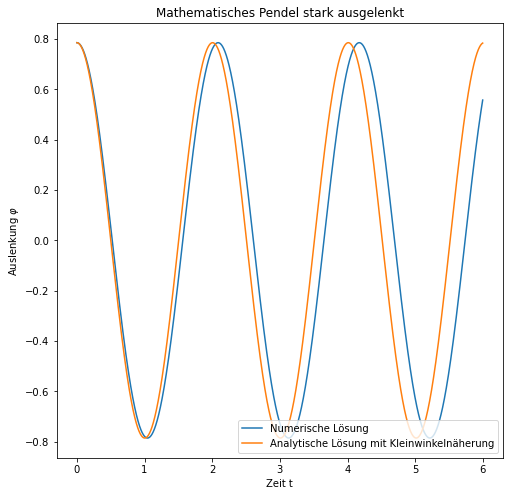

In [2]:
# matplotlib.pyplot importieren
from matplotlib import pyplot as plt
# Plot initialisieren
plt.figure(figsize = [8, 8])
plt.title("Mathematisches Pendel stark ausgelenkt")
plt.xlabel("Zeit t")
plt.ylabel("Auslenkung $\\varphi$")
plt.plot(t, phis, label = "Numerische Lösung")
plt.plot(t, phi0 * np.cos((g / L)**0.5 * t), label = "Analytische Lösung mit Kleinwinkelnäherung")
plt.legend(loc="lower right")
plt.show()

Mir fällt beim Vergleich auf: 

Die Frequenz weicht ab: die analytische Lösung ist hochfrequenter als die Numerische. Das kommt daher, dass für $t > 0$ auch $t > sin(t)$ ist, also ist die in der analytischen Lösung angenommene rücktreibende Kraft größer als die tatsächliche.

**c)** Wiederholen Sie die Schritte **a)** und **b)** für $\varphi_0 = \pi/16.$ Was beobachten Sie?

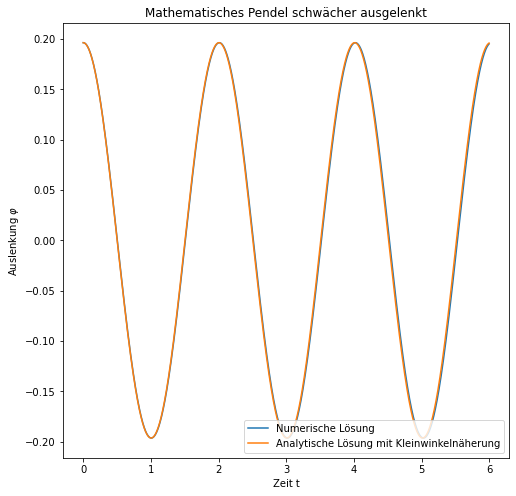

In [3]:
# neue anfangsbedingungen
phi0 = np.pi / 16
w0 = 0
#liste für phi leeren
phis = []
#integrieren
phi = phi0
w = w0
for k in t:
    phis.append(phi)
    phi, w = step(phi = phi, w = w)
# Plot initialisieren
plt.figure(figsize = [8, 8])
plt.title("Mathematisches Pendel schwächer ausgelenkt")
plt.xlabel("Zeit t")
plt.ylabel("Auslenkung $\\varphi$")
plt.plot(t, phis, label = "Numerische Lösung")
plt.plot(t, phi0 * np.cos((g / L)**0.5 * t), label = "Analytische Lösung mit Kleinwinkelnäherung")
plt.legend(loc="lower right")

Ich beobachte:
jetzt passt es wesentlich besser, da bei diesem Winkel die kleinwinkelnäherung für den Sinus erheblichbesser ist